In [281]:
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [282]:
df_clasificados = pd.read_excel('C:/Users/maria/OneDrive/Escritorio/Sourceowm/Capacitaciones/DDS/Cursada/Circular_python/Maquina de soporte vectorial/Clientes_Credito.xlsx')
df_clasificados

,Cliente,Monto Credito,Ingreso Neto,Coeficiente Credito,Monto Cuota,Grado Académico,Buen Pagador
0,1,2,4,3,1,4,1
1,2,2,3,2,1,4,1
2,3,4,1,1,4,2,2
3,4,1,4,3,1,4,1
4,5,3,3,1,3,2,2
5,6,3,4,3,1,4,1
6,7,4,2,1,3,2,2
7,8,4,1,3,3,2,2
8,9,3,4,3,1,3,1
9,10,1,3,2,2,4,1


In [283]:
df_test = pd.read_excel('Clientes_Test.xlsx')

In [284]:
buen_pagador = df_clasificados['Buen Pagador'][df_clasificados['Buen Pagador'] == 1].count()/len(df_clasificados)

In [285]:
mal_pagador = df_clasificados['Buen Pagador'][df_clasificados['Buen Pagador'] == 2].count()/len(df_clasificados)

In [286]:
print(f'%buen_pagador = {buen_pagador}\n%mal_pagador = {mal_pagador}')

%buen_pagador = 0.6
%mal_pagador = 0.4


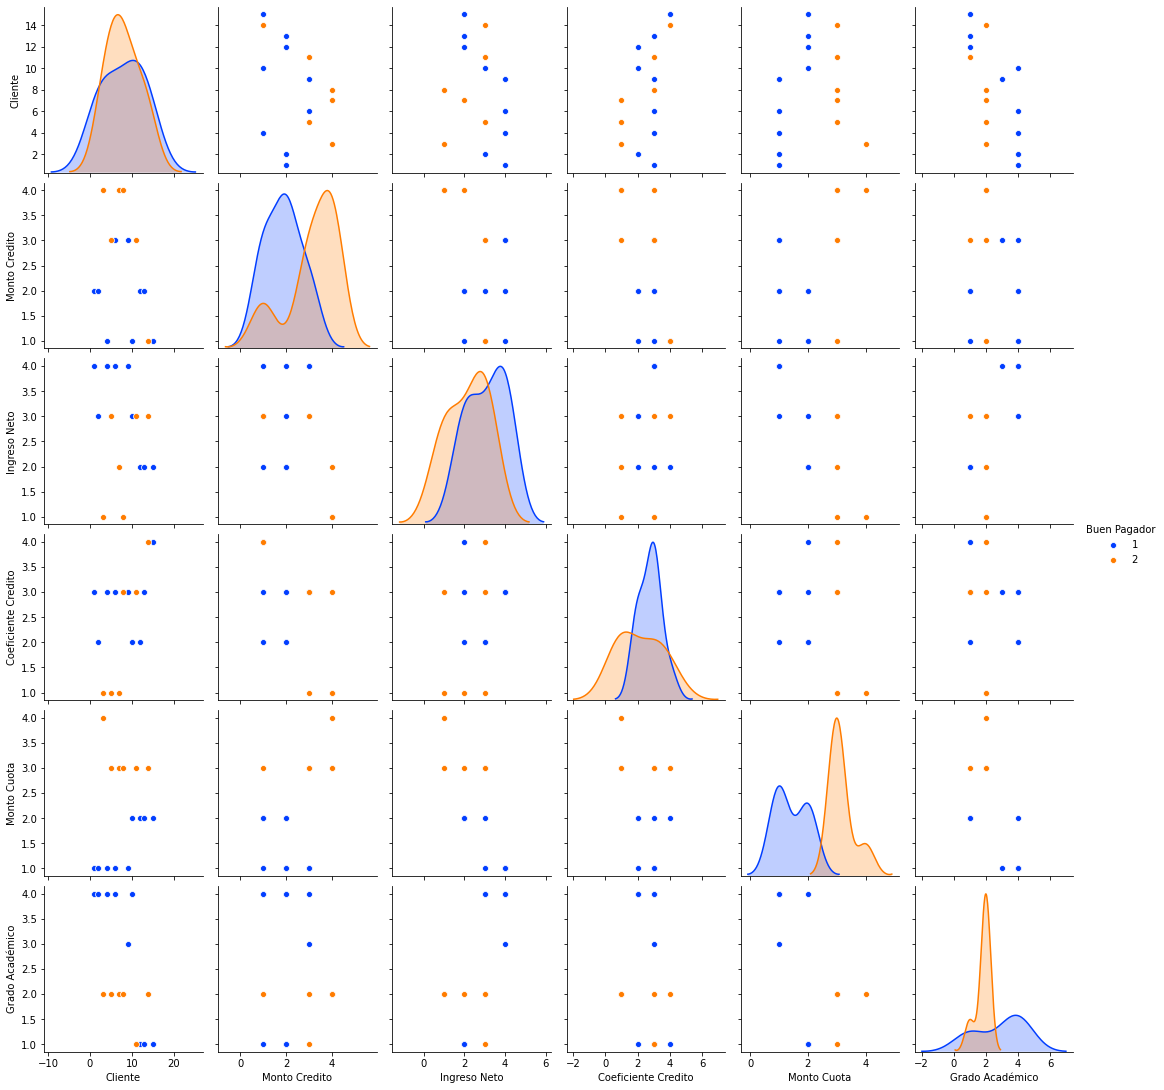

In [287]:
sns.pairplot(df_clasificados,palette='bright', hue='Buen Pagador')

[]

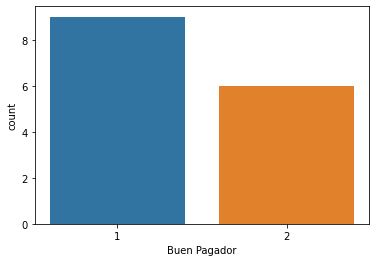

In [288]:
sns.countplot(x=df_clasificados['Buen Pagador'])
plt.plot()

In [289]:
rel = pd.DataFrame.corrwith(df_clasificados,df_test)
print(rel, type(rel))

Cliente                1.000000
Monto Credito          0.320256
Ingreso Neto          -0.405046
Coeficiente Credito   -0.111406
Monto Cuota            1.000000
Grado Académico        1.000000
Buen Pagador                NaN
dtype: float64 <class 'pandas.core.series.Series'>


In [290]:
df_clasificados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Cliente              15 non-null     int64
 1   Monto Credito        15 non-null     int64
 2   Ingreso Neto         15 non-null     int64
 3   Coeficiente Credito  15 non-null     int64
 4   Monto Cuota          15 non-null     int64
 5   Grado Académico      15 non-null     int64
 6   Buen Pagador         15 non-null     int64
dtypes: int64(7)
memory usage: 968.0 bytes


In [291]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cliente              7 non-null      int64  
 1   Monto Credito        7 non-null      int64  
 2   Ingreso Neto         7 non-null      int64  
 3   Coeficiente Credito  7 non-null      int64  
 4   Monto Cuota          7 non-null      int64  
 5   Grado Académico      7 non-null      int64  
 6   Buen Pagador         0 non-null      float64
dtypes: float64(1), int64(6)
memory usage: 520.0 bytes


In [292]:
df_clasificados = df_clasificados.drop(['Cliente'],axis = 1)
df_clasificados.head()

,Monto Credito,Ingreso Neto,Coeficiente Credito,Monto Cuota,Grado Académico,Buen Pagador
0,2,4,3,1,4,1
1,2,3,2,1,4,1
2,4,1,1,4,2,2
3,1,4,3,1,4,1
4,3,3,1,3,2,2


In [293]:
df_clasificados.corr()

,Monto Credito,Ingreso Neto,Coeficiente Credito,Monto Cuota,Grado Académico,Buen Pagador
Monto Credito,1.000000,-0.394771,-0.527436,0.463114,-0.194296,0.577897
Ingreso Neto,-0.394771,1.000000,0.288625,-0.730873,0.658699,-0.463713
Coeficiente Credito,-0.527436,0.288625,1.000000,-0.368932,-0.042447,-0.312884
Monto Cuota,0.463114,-0.730873,-0.368932,1.000000,-0.632851,0.881764
Grado Académico,-0.194296,0.658699,-0.042447,-0.632851,1.000000,-0.429605
Buen Pagador,0.577897,-0.463713,-0.312884,0.881764,-0.429605,1.000000


<AxesSubplot:>

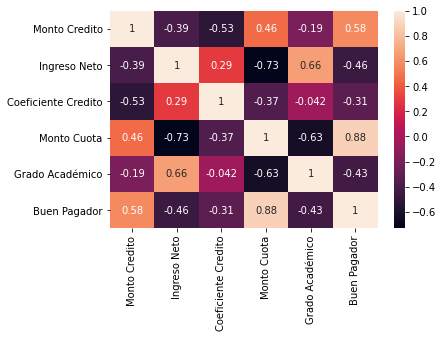

In [294]:
sns.heatmap(df_clasificados.corr(), annot = True)

In [295]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import OrdinalEncoder

In [296]:
df_clasificados.nunique()

Monto Credito          4
Ingreso Neto           4
Coeficiente Credito    4
Monto Cuota            4
Grado Académico        4
Buen Pagador           2
dtype: int64

In [297]:
# buen pagador es la variable objetivo
x = df_clasificados.drop(['Buen Pagador'], axis=1)
y = df_clasificados['Buen Pagador']
x.shape, y.shape

((15, 5), (15,))

In [298]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=123)

In [299]:
df_clasificados.columns

Index(['Monto Credito', 'Ingreso Neto', 'Coeficiente Credito', 'Monto Cuota',
       'Grado Académico', 'Buen Pagador'],
      dtype='object')

In [300]:

model = KNeighborsClassifier(n_neighbors=5, weights='distance')
model.fit(x_train,y_train)

KNeighborsClassifier(weights='distance')

In [301]:
model.score(x_test,y_test)

0.25

In [302]:
y_pred = model.predict(x_test)

In [303]:
x_nuevos = df_test.iloc[:,1:6]
y_nuevos = model.predict(x_nuevos)
y_nuevos

array([1, 1, 1, 1, 1, 1, 2], dtype=int64)

In [304]:
df_test['Buen Pagador'] = y_nuevos

In [305]:
df_test

,Cliente,Monto Credito,Ingreso Neto,Coeficiente Credito,Monto Cuota,Grado Académico,Buen Pagador
0,100,5,4,3,1,4,1
1,101,4,3,2,1,4,1
2,102,4,6,5,4,2,1
3,103,3,4,4,1,4,1
4,104,4,3,5,3,2,1
5,105,8,4,3,1,4,1
6,106,5,3,1,3,2,2


In [306]:
model2 = SVC(kernel= 'poly')
model2.fit(x_train,y_train)

SVC(kernel='poly')

In [307]:
model2.score(x_test,y_test)

1.0

In [308]:
y_pred2 = model2.predict(x_test)

In [309]:
y_nuevos2 = model2.predict(x_nuevos)
y_nuevos2

array([2, 1, 2, 1, 2, 2, 2], dtype=int64)

In [310]:
df_clasificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Monto Credito        15 non-null     int64
 1   Ingreso Neto         15 non-null     int64
 2   Coeficiente Credito  15 non-null     int64
 3   Monto Cuota          15 non-null     int64
 4   Grado Académico      15 non-null     int64
 5   Buen Pagador         15 non-null     int64
dtypes: int64(6)
memory usage: 848.0 bytes


In [311]:
col_res = ['Pagador KNN','Pagador SVC']

In [312]:
df_KNN = pd.DataFrame(model.predict(x_nuevos), columns=['Pagador KNN'])
df_SVC = pd.DataFrame(model2.predict(x_nuevos), columns=['Pagador SVC'])

In [315]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Cliente              7 non-null      int64
 1   Monto Credito        7 non-null      int64
 2   Ingreso Neto         7 non-null      int64
 3   Coeficiente Credito  7 non-null      int64
 4   Monto Cuota          7 non-null      int64
 5   Grado Académico      7 non-null      int64
 6   Buen Pagador         7 non-null      int64
dtypes: int64(7)
memory usage: 520.0 bytes


In [316]:
df_test = df_test.drop(['Buen Pagador'], axis=1)

In [317]:
df_resumen = pd.concat([df_test,df_KNN,df_SVC], axis=1)
df_resumen

,Cliente,Monto Credito,Ingreso Neto,Coeficiente Credito,Monto Cuota,Grado Académico,Pagador KNN,Pagador SVC
0,100,5,4,3,1,4,1,2
1,101,4,3,2,1,4,1,1
2,102,4,6,5,4,2,1,2
3,103,3,4,4,1,4,1,1
4,104,4,3,5,3,2,1,2
5,105,8,4,3,1,4,1,2
6,106,5,3,1,3,2,2,2
